choose your own research question 
Go out and find a dataset of interest. It could be one that helps you work on one of our recommended research questions, or any other dataset that addresses an unsupervised learning question of your own.

1.Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

2.You should try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

3.Things to keep in mind: how do clustering and modeling compare? What are the advantages of each? Why would you want to use one over the other?

This will ultimately include the following deliverables:

A Jupyter notebook that tells a compelling story about your data (to be submitted at the end of this checkpoint).
A 15 to 30 minute presentation of your findings. You'll need to produce a deck and present it to the Thinkful community.
Conduct the analysis in Jupyter. Provide a complete research report using the framework introduced in the previous module. The report should include compelling visualizations and actionable insights, telling the story to your intended audience. Walk through the analysis using clean, reproducible code. Include plenty of notes and comments to guide others through your thinking.

Rather than create a deck in a presentation tool like PowerPoint or Google Slides, we will use Jupyter’s built-in slide deck capabilities. This cuts down on the time-consuming and error-prone process of copying-and-pasting into an external program. The presentation is also fully reproducible.

On the day of your presentation, an evaluator from the Thinkful educator team will introduce you, and then you'll give your presentation. Afterward, the evaluator will ask you follow up questions and will grade your performance on your presentation. Members of the audience will also be encouraged to ask follow up questions.

Be prepared to talk about:

- Your end-user and the value your project provides to them.
- Quantifiable results based on the research you’ve conducted.
- The visuals you chose and what they represent for your research.
- Next steps you'd take to expand on your work.
- A specified research question your model addresses.
- How you chose your model specification and what alternatives you compared it to.
- The practical uses of your model for an audience of interest.
- Any weak points or shortcomings of your model. 

Analysis of 2018 NJ Transit and Amtrak data.

All data used is available here: https://www.kaggle.com/pranavbadami/nj-transit-amtrak-nec-performance




NJ Transit + Amtrak (NEC) Rail Performance
Granular performance data from 150k+ NJ Transit and Amtrak train trips
https://www.kaggle.com/pranavbadami/nj-transit-amtrak-nec-performance

In [1]:
# Load necessory libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import  silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Preprocessing Data
### Reading and Exploring the Data Set 

In [65]:
df_2019 = pd.read_csv('NJ-transit/2019_01.csv')
for i in range(2,5):
    df_2019 = df_2019.append(pd.read_csv('NJ-transit/2019_0'+str(i)+'.csv'))
df_2019.head()

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2019-01-01,.8905,NaN,New York Penn Station,105.0,New York Penn Station,105.0,NaN,2019-01-01 02:20:04,NaN,cancelled,Morristown Line,Amtrak
1,2019-01-01,.8905,NaN,New York Penn Station,105.0,Secaucus Upper Lvl,38187.0,NaN,2019-01-01 02:20:04,NaN,departed,Morristown Line,Amtrak
2,2019-01-01,A2228,NaN,Philadelphia,1.0,Philadelphia,1.0,NaN,2019-01-01 21:40:06,NaN,departed,ACELA EXPRESS,Amtrak
3,2019-01-01,A2228,NaN,Philadelphia,1.0,Metropark,83.0,NaN,2019-01-01 22:24:07,NaN,departed,ACELA EXPRESS,Amtrak
4,2019-01-01,A2228,NaN,Metropark,83.0,Newark Penn Station,107.0,NaN,2019-01-01 22:38:19,NaN,departed,ACELA EXPRESS,Amtrak


In [31]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927744 entries, 0 to 238692
Data columns (total 13 columns):
date              927744 non-null object
train_id          927744 non-null object
stop_sequence     829278 non-null float64
from              927744 non-null object
from_id           927742 non-null float64
to                927744 non-null object
to_id             927742 non-null float64
scheduled_time    829278 non-null object
actual_time       927744 non-null object
delay_minutes     829278 non-null float64
status            927744 non-null object
line              927744 non-null object
type              927744 non-null object
dtypes: float64(4), object(9)
memory usage: 99.1+ MB


Text(0.5, 1.0, 'Persantage of transit operated by the transit companies')

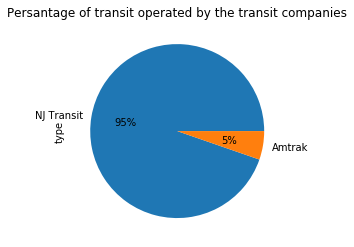

In [4]:
df_2019['type'].value_counts().plot.pie(autopct='%1.0f%%',
                                shadow=False, startangle=0)
plt.title('Persantage of transit operated by the transit companies')

In [32]:
df_2019.isnull().sum()

date                  0
train_id              0
stop_sequence     98466
from                  0
from_id               2
to                    0
to_id                 2
scheduled_time    98466
actual_time           0
delay_minutes     98466
status                0
line                  0
type                  0
dtype: int64

In [45]:
df_2019[df_2019['type'] == 'Amtrak'].count()

date              49252
train_id          49252
stop_sequence         0
from              49252
from_id           49252
to                49252
to_id             49252
scheduled_time        0
actual_time       49252
delay_minutes         0
status            49252
line              49252
type              49252
dtype: int64

From above we can see that missing values are for three variables, stop_sequence, scheduled_time, and delay_minutes, and all obsevations operated by Amtrak don't have values related to these variables. 

In [43]:
df_2019[df_2019['type'] == 'NJ Transit'].count()

date              878492
train_id          878492
stop_sequence     829278
from              878492
from_id           878490
to                878492
to_id             878490
scheduled_time    829278
actual_time       878492
delay_minutes     829278
status            878492
line              878492
type              878492
dtype: int64

There are enough observations to analyse if we drop those which are missing values, after all about 10% of all data contains observations wiyh missin values. So we drop them.
# Data Cleaning

In [66]:
# Drop missing values
df_2019 = df_2019.dropna()

In [18]:
df_2019[df_2019['type'] == 'Amtrak'].count()

date              0
train_id          0
stop_sequence     0
from              0
from_id           0
to                0
to_id             0
scheduled_time    0
actual_time       0
delay_minutes     0
status            0
line              0
type              0
dtype: int64

In [19]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829276 entries, 6 to 238688
Data columns (total 13 columns):
date              829276 non-null object
train_id          829276 non-null object
stop_sequence     829276 non-null float64
from              829276 non-null object
from_id           829276 non-null float64
to                829276 non-null object
to_id             829276 non-null float64
scheduled_time    829276 non-null object
actual_time       829276 non-null object
delay_minutes     829276 non-null float64
status            829276 non-null object
line              829276 non-null object
type              829276 non-null object
dtypes: float64(4), object(9)
memory usage: 88.6+ MB


In [20]:
display(df_2019.isnull().any())

date              False
train_id          False
stop_sequence     False
from              False
from_id           False
to                False
to_id             False
scheduled_time    False
actual_time       False
delay_minutes     False
status            False
line              False
type              False
dtype: bool

Text(0.5, 1.0, 'Transit operated by the transit companies after cleaning')

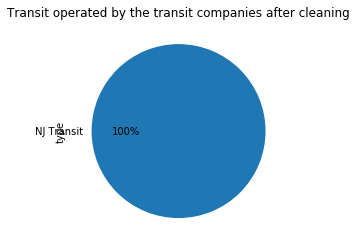

In [6]:
df['type'].value_counts().plot.pie(autopct='%1.0f%%',
                                shadow=False, startangle=0)
plt.title('Transit operated by the transit companies after cleaning')

100% of remaining data is operated by NJ Transit. So the analysis will be for NJ Transit network. 
# Data Visualization

In [67]:
numeric = df_2019.select_dtypes(['float64']).columns
categoric =  df_2019.select_dtypes(['object']).columns

### Graphs of the Numeric Variables:

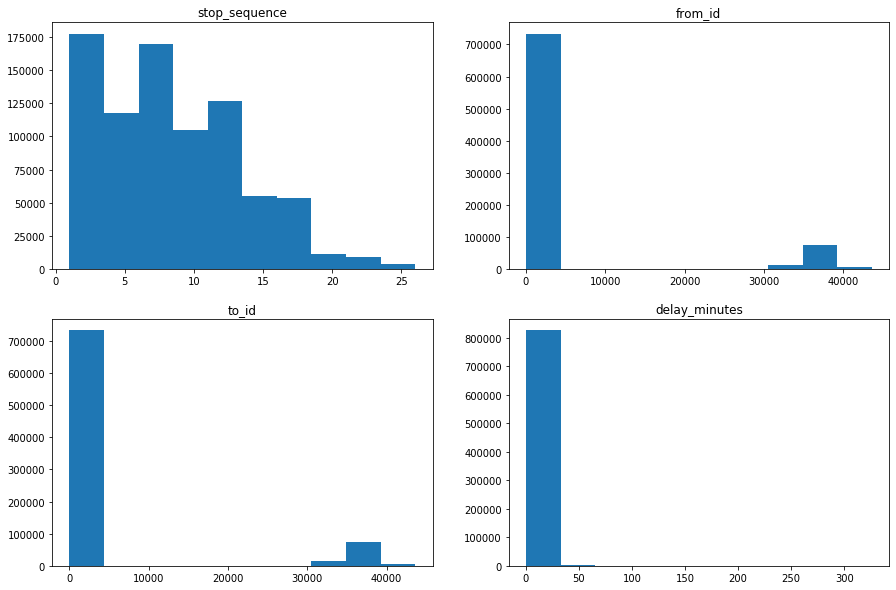

In [24]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric, 1):
    plt.subplot(2, 2, i)
    plt.hist(df_2019[col])
    plt.title(col)

delay_minutes    1.000000
stop_sequence    0.066520
to_id            0.011212
from_id         -0.014874
Name: delay_minutes, dtype: float64 



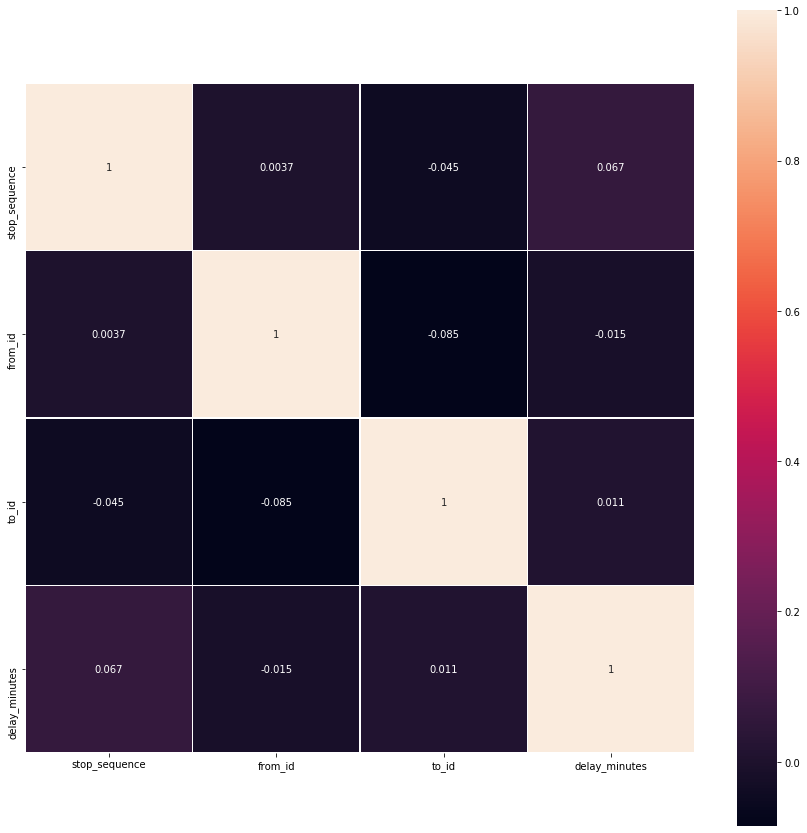

In [75]:
numeric_features = df_2019.select_dtypes(include=[np.number])

correlation = numeric_features.corr()
print(correlation['delay_minutes'].sort_values(ascending=False), '\n')

f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(correlation, square=True, linewidths=0.5, annot=True)
plt.show()

### Graphs of the Categorical Variables:

In [36]:
categoric.unique()

Index(['date', 'train_id', 'from', 'to', 'scheduled_time', 'actual_time',
       'status', 'line', 'type'],
      dtype='object')

In [33]:
df_2019['line'].unique()

array(['Montclair-Boonton', 'Bergen Co. Line ', 'No Jersey Coast',
       'Northeast Corrdr', 'Raritan Valley', 'Pascack Valley',
       'Main Line', 'Morristown Line', 'Gladstone Branch',
       'Princeton Shuttle'], dtype=object)

In [34]:
# Stations names - the same for df_2019['to']
df_2019['from'].unique()

array(['Hoboken', 'Newark Broad Street', 'Watsessing Avenue',
       'Bloomfield', 'Glen Ridge', 'Secaucus Lower Lvl', 'Rutherford',
       'Wesmont', 'Garfield', 'Plauderville', 'Broadway Fair Lawn',
       'Radburn Fair Lawn', 'Glen Rock Boro Hall', 'Ridgewood',
       'Ho-Ho-Kus', 'Long Branch', 'Elberon', 'Allenhurst', 'Asbury Park',
       'Bradley Beach', 'Belmar', 'Spring Lake', 'Manasquan',
       'Point Pleasant Beach', 'Trenton', 'Hamilton',
       'Princeton Junction', 'New Brunswick', 'Edison', 'Metuchen',
       'Metropark', 'Rahway', 'Linden', 'Elizabeth', 'Newark Airport',
       'Newark Penn Station', 'Secaucus Upper Lvl',
       'New York Penn Station', 'Union', 'Roselle Park', 'Cranford',
       'Westfield', 'Fanwood', 'Netherwood', 'Plainfield', 'Dunellen',
       'Bound Brook', 'Bridgewater', 'Somerville', 'Spring Valley',
       'Nanuet', 'Pearl River', 'North Elizabeth', 'Garwood', 'Kingsland',
       'Lyndhurst', 'Delawanna', 'Passaic', 'Clifton', 'Paterson',
   

In [76]:
select_categoric = ['status', 'line']

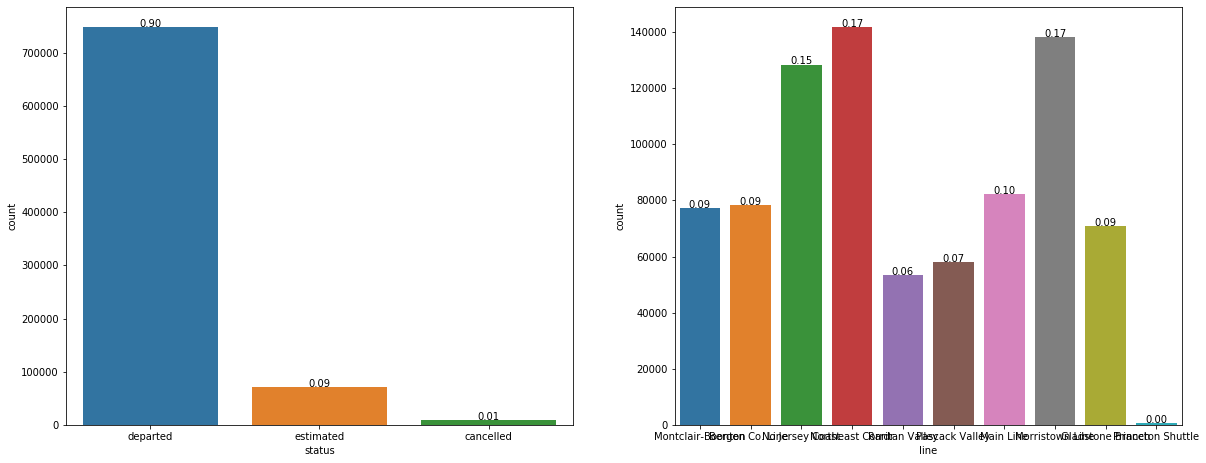

In [47]:
total_records= len(df_2019)
plt.figure(figsize=(20,2))
j=0
for i in select_categoric:
    j +=1
    plt.subplot(1,2,j)
    ax1 = sns.countplot(data=df,x= i)
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

In [61]:
d_ontime_count = df_2019['delay_minutes'][df_2019['delay_minutes']<=0].count()
d_delay_count = df_2019['delay_minutes'][df_2019['delay_minutes']>0].count()
d_cancelled_count = df_2019['status'][df_2019['status'] == 'cancelled'].count()

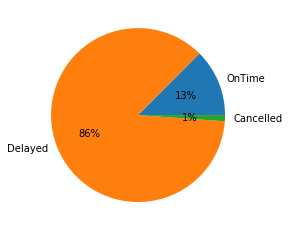

In [63]:
# Total Status
d_status = [d_ontime_count, d_delay_count , d_cancelled_count]
labels = 'OnTime', 'Delayed' , 'Cancelled'
# Pie chart for totla status
plt.pie(d_status, labels = labels, autopct='%1.0f%%',startangle=0)
plt.title('NJ Transit Status - First Quarter of 2019')
plt.show()

A very high percentafge of NJ transit is with delay. This can be a good reason to choose this factor as a target variable when it is needed.<br>
Also these variables do not contribute a significant information for the analysis:<br>
'type': all the transit is operated by a company<br>
'train_id': does not impact significantly on the analysis<br>
'from_id': does not impact significantly on the analysis<br>
'to_id': does not impact significantly on the analysis<br>
So we can drop these variables.

In [57]:
df_2019 = df_2019.drop(columns=['train_id','from_id','to_id','type'], axis=1)

In [64]:
df_2019.head()

,date,stop_sequence,from,to,scheduled_time,actual_time,delay_minutes,status,line
6,2019-01-01,1.0,Hoboken,Hoboken,2019-01-01 23:08:00,2019-01-01 23:07:00,0.00,departed,Montclair-Boonton
7,2019-01-01,2.0,Hoboken,Newark Broad Street,2019-01-01 23:26:00,2019-01-01 23:32:39,6.65,departed,Montclair-Boonton
8,2019-01-01,3.0,Newark Broad Street,Watsessing Avenue,2019-01-01 23:38:00,2019-01-01 23:40:00,2.00,estimated,Montclair-Boonton
9,2019-01-01,4.0,Watsessing Avenue,Bloomfield,2019-01-01 23:40:00,2019-01-01 23:43:00,3.00,estimated,Montclair-Boonton
10,2019-01-01,5.0,Bloomfield,Glen Ridge,2019-01-01 23:43:00,2019-01-01 23:45:00,2.00,estimated,Montclair-Boonton
